In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

#****Data Preprocessing****

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
        

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
# removing columns Unnamed: 2	Unnamed: 3	Unnamed: 4
df.drop(df.iloc[:,2:], axis=1, inplace=True) 

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renaming the cols v1 and v2 to get a better understanding
df.rename(columns={'v1':'Class','v2':'Text'},inplace=True)

In [9]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#check for missing vals
df.isnull().sum()

Class    0
Text     0
dtype: int64

In [11]:
#check duplicate vals
df.duplicated().sum()

403

In [12]:
#removing the duplicated values
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])

In [14]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#From above we see that ham:0 and spam:1
df['Class'].value_counts()

0    4516
1     653
Name: Class, dtype: int64

In [16]:
#Adding new in relation with number of characters,number of words, number of sentences in a row. 
df['num_chars']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sents']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Class,Text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
#Statistical description for ham
df[df['Class']==0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
#Statistical description for spam
df[df['Class']==1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Reading')  #shortens the word 

'read'

In [21]:
def modify_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)
    

In [22]:
df['Text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [23]:
modify_text(df['Text'][9]) #transforms the original sentence

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [24]:
##Adding a column to include all the modified texts
df['Modified_text']=df['Text'].apply(modify_text)

In [25]:
df.head(10)

,Class,Text,num_chars,num_words,num_sents,Modified_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


#****EDA(Exploratory Data Analysis)****

<AxesSubplot:title={'center':'No.of characters for ham vs spam'}, xlabel='num_chars', ylabel='Count'>

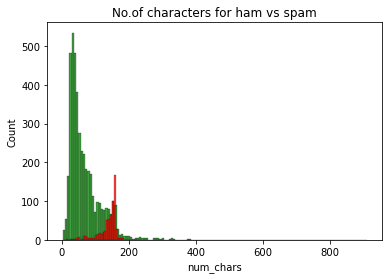

In [26]:
plt.title('No.of characters for ham vs spam')
sns.histplot(df[df['Class']==0]['num_chars'],color='green')
sns.histplot(df[df['Class']==1]['num_chars'],color='red')

<AxesSubplot:title={'center':'No.of words for ham vs spam'}, xlabel='num_words', ylabel='Count'>

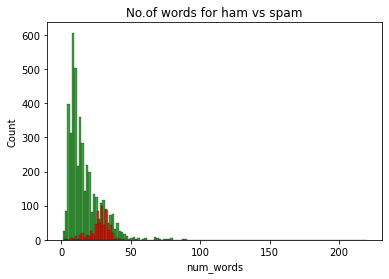

In [27]:
plt.title('No.of words for ham vs spam')
sns.histplot(df[df['Class']==0]['num_words'],color='green')
sns.histplot(df[df['Class']==1]['num_words'],color='red')

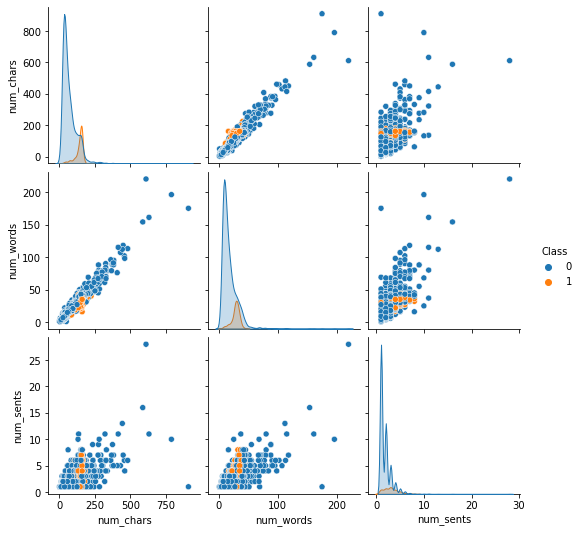

In [28]:
sns.pairplot(df,hue='Class')

<AxesSubplot:>

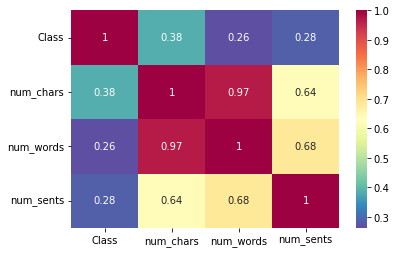

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='Spectral_r')

Text(0.5, 1.0, 'Spam wordcloud')

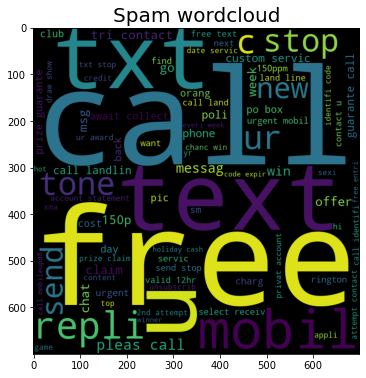

In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=15,background_color='black')
spam_wc=wc.generate(df[df['Class']==1]['Modified_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.title('Spam wordcloud',fontsize=20)
##Wordcloud displays the number of words ,the larger and bolder the term, the more frequently it appears   

Text(0.5, 1.0, 'Ham Wordcloud')

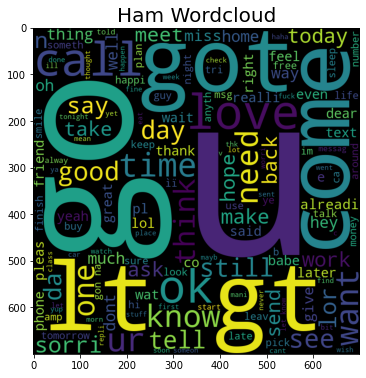

In [31]:
wc=WordCloud(width=700,height=700,min_font_size=15,background_color='black')
ham_wc=wc.generate(df[df['Class']==0]['Modified_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.title('Ham Wordcloud',fontsize=20)

Text(0.5, 1.0, 'Most common 25 words in spam messages')

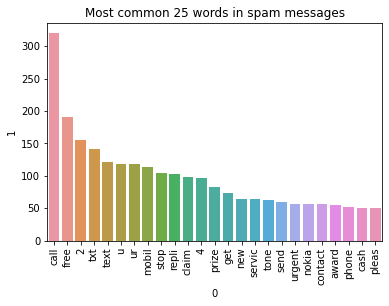

In [32]:
df[df['Class']==1]['Modified_text'].tolist()
spam_corpus=[]
for msg in df[df['Class']==1]['Modified_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.title('Most common 25 words in spam messages')

Text(0.5, 1.0, 'Most common 25 words in ham messages')

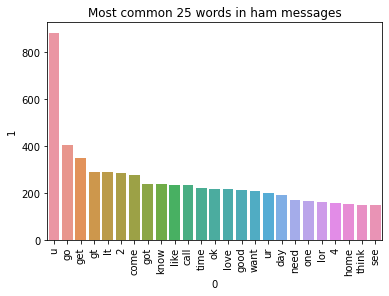

In [33]:
ham_corpus=[]
for msg in df[df['Class']==0]['Modified_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.title('Most common 25 words in ham messages')

#****Model Building and Evaluation****

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['Modified_text']).toarray()
y=df['Class'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [54]:
#Implementing Navie Baye's classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
#Gaussian Naive Baye's classifier
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('Gnb\n')
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))
#Multinomial Naive Baye's classifier
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print('\n\nMnb\n')
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))
#Bernoulli Naive Baye's classifier
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print('\n\nBnb\n')
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Gnb

Accuracy score: 0.8471953578336557
Confusion matrix: [[765 138]
 [ 20 111]]
Precision score: 0.4457831325301205


Mnb

Accuracy score: 0.9796905222437138
Confusion matrix: [[903   0]
 [ 21 110]]
Precision score: 1.0


Bnb

Accuracy score: 0.9825918762088974
Confusion matrix: [[901   2]
 [ 16 115]]
Precision score: 0.9829059829059829


In [55]:
#Implementing K nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.9187620889748549
Confusion matrix: [[903   0]
 [ 84  47]]
Precision score: 1.0


In [56]:
#Implementing logistic Regression
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,y_train)
y_pred=lrc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.9555125725338491
Confusion matrix: [[901   2]
 [ 44  87]]
Precision score: 0.9775280898876404


In [57]:
#Implementing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(X_train,y_train)
y_pred=dct.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.9564796905222437
Confusion matrix: [[884  19]
 [ 26 105]]
Precision score: 0.8467741935483871


In [58]:
#Implementing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.9796905222437138
Confusion matrix: [[900   3]
 [ 18 113]]
Precision score: 0.9741379310344828


In [59]:
#Implementing ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.9825918762088974
Confusion matrix: [[901   2]
 [ 16 115]]
Precision score: 0.9829059829059829


In [60]:
#Implementing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))

Accuracy score: 0.965183752417795
Confusion matrix: [[897   6]
 [ 30 101]]
Precision score: 0.9439252336448598


#****Conclusion****

We select Multinomial Naive Baye's as our email spam classifier.
It shows a good accuracy and a steady precision score of 1 for most variations of the given dataset.